In [34]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau,EarlyStopping, LambdaCallback, ModelCheckpoint, CSVLogger
from keras.models import load_model

from ipynb.fs.full import DataLoader
from ipynb.fs.full import Models

import seaborn as sns

from sklearn.model_selection import cross_val_score

import importlib
importlib.reload(DataLoader)
importlib.reload(Models)

<module 'ipynb.fs.full.Models' (C:\Users\ocean\Documents\Projects\Zoidberg\Models.ipynb)>

### Parameters

In [35]:
samplesTrain = random.randint(2500, 5000) #max : 5219 par ex 50 en normal et 50 en pneumonia à voir si intervalle random c'est mieux 
samplesVal = 19 #max : 19
samplesTest = random.randint(400, 625) #max : 625

batch_size=64
percent=0.6
learning_rate=0.001
epochs = 10

random_state= 1
max_iter=1000

In [ ]:
data_loader = DataLoader.DataLoader(samplesTrain,
                         samplesVal,
                         samplesTest,
                         batch_size=batch_size,
                         augment_data=True,
                         shuffle=True)

############################################################################################
input\train/NORMAL
Processed image 1/1342
Processed image 2/1342
Processed image 3/1342
Processed image 4/1342
Processed image 5/1342
Processed image 6/1342
Processed image 7/1342
Processed image 8/1342
Processed image 9/1342


In [ ]:
train_data = data_loader.load_train_generator()
val_data   = data_loader.load_validation_generator()
test_data  = data_loader.load_test_generator()

In [ ]:
train_X, train_y = train_data[0]
val_X, val_y = val_data[0]
test_X, test_y = test_data[0]

In [ ]:
print(len(train_X))

In [ ]:
print(len(val_X))

In [ ]:
print(len(test_X))  

### Create CNN model

### Load data

In [9]:
model = Models.MLP_MLPClassifier(activation='tanh',
                          random_state=random_state,
                          hidden_layer_sizes=(300,300),
                          max_iter=max_iter,
                          batch_size=64,
                          learning_rate=learning_rate,
                          early_stopping= False)

In [10]:
train_X = train_X.reshape(train_X.shape[0], -1)
val_X = val_X.reshape(val_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

### Cross validation

In [11]:
X = np.concatenate((train_X, val_X))
y = np.concatenate((train_y, val_y))

In [12]:
cv_scores = cross_val_score(model, X, y, cv=5)  # Adjust the number of folds as needed

In [13]:
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.61267606 0.61384977 0.61267606 0.61457109 0.613396  ]


In [14]:
print("Mean CV accuracy:", np.mean(cv_scores))

Mean CV accuracy: 0.6134337950933173


In [15]:
print("Standard deviation of CV accuracy:", np.std(cv_scores))

Standard deviation of CV accuracy: 0.0007233590368203011


#### Train Model

In [16]:
# model_fit = model.fit(
#         X = train_X, #images
#         y = train_y, #labels
#     )      

epoch :  0 /20
epoch :  1 /20
epoch :  2 /20
epoch :  3 /20
epoch :  4 /20
epoch :  5 /20
epoch :  6 /20
epoch :  7 /20
epoch :  8 /20
epoch :  9 /20
Training stopped early at epoch 9


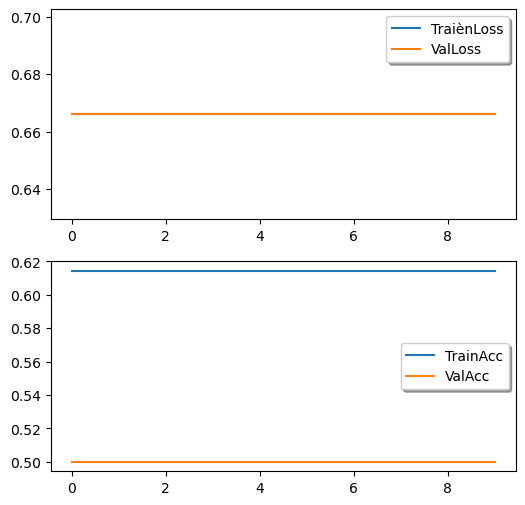

In [17]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(100):
    print('epoch : ', epoch,'/20')
    model.fit(train_X, train_y)

    train_acc = model.score(train_X, train_y)
    val_acc = model.score(val_X, val_y)
    train_losses.append(model.model.loss_curve_[-1])
    val_losses.append(model.model.loss_curve_[-1])
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    if model.early_stopping and model.model.n_iter_no_change == epoch + 1:
        print('Training stopped early at epoch', epoch)
        break

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(train_losses, label="TraiènLoss")
ax[0].plot(val_losses, label="ValLoss")
ax[0].legend(loc='best', shadow=True)

ax[1].plot(train_accs, label="TrainAcc")
ax[1].plot(val_accs, label="ValAcc")
ax[1].legend(loc='best', shadow=True)
plt.show()

### Evaluating Model on Test Data

In [18]:
train_score = model.score(train_X, train_y)

In [19]:
print('\nModel Accuracy Train: ', train_score)


Model Accuracy Train:  0.6142924751538098


In [20]:
val_score = model.score(val_X, val_y)

In [21]:
print('\nModel Accuracy Validation: ', val_score)


Model Accuracy Validation:  0.5


### Matrix Confusion

In [37]:
"""
Predict the labels on test_X
if > 0.5 => + sinon -
"""
print(len(test_X))
predict_out = model.predict(test_X)

528


In [38]:
print(predict_out,'\n', '\n', test_y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [39]:
conf_matrix = confusion_matrix(y_true=test_y, y_pred=predict_out)

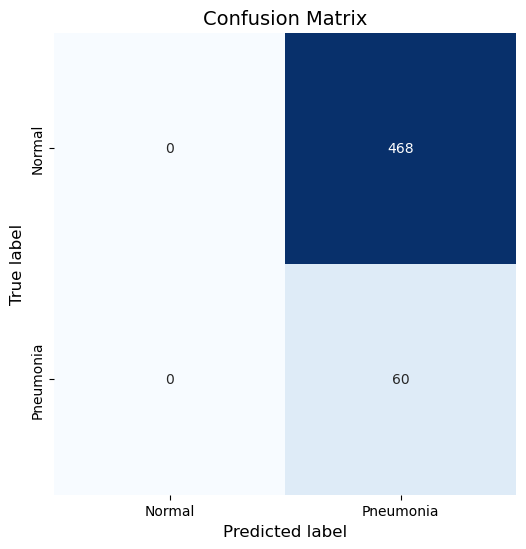

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=['Normal','Pneumonia'], yticklabels=['Normal','Pneumonia'])
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [26]:
# train_losses = []
# val_losses = []
# train_accs = []
# val_accs = []

# for epoch in range(20):
#     print('epoch : ', epoch,'/20')
#     model.partial_fit(train_X, train_y, classes=np.unique(train_y))
#     train_acc = model.score(train_X, train_y)
#     val_acc = model.score(val_X, val_y)
#     train_losses.append(model.model.loss_)
#     val_losses.append(model.model.loss_)
#     train_accs.append(train_acc)
#     val_accs.append(val_acc)

# fig, ax = plt.subplots(2, 1, figsize=(6, 6))
# ax[0].plot(train_losses, label="TrainLoss")
# ax[0].plot(val_losses, label="ValLoss")
# ax[0].legend(loc='best', shadow=True)

# ax[1].plot(train_accs, label="TrainAcc")
# ax[1].plot(val_accs, label="ValAcc")
# ax[1].legend(loc='best', shadow=True)
# plt.show()